<h2 style="text-align:center">Netflix Data Visualization - Week 3 Assignment</h2>

<b>Loading Libraries</b>

In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install kagglehub

<b>Importing Libraries</b>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import kagglehub

<b>Learned that setting a style makes plots look better</b>

In [7]:
plt.style.use('default')
sns.set_palette("Set2")

<b>Downloading the Netflix dataset</b>

In [8]:
path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Dataset downloaded to:", path)

100%|██████████| 1.34M/1.34M [00:01<00:00, 890kB/s]

Extracting files...
Dataset downloaded to: C:\Users\lenovo\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


<b>Loading the data</b>

In [9]:
data = pd.read_csv(path + '/netflix_titles.csv')
print("Data loaded successfully!")
print(f"We have {len(data)} rows and {len(data.columns)} columns")

Data loaded successfully!
We have 8807 rows and 12 columns


<b>To see what we are working with</b>

In [11]:
print("\nFirst few rows:")
print(data.head())
print("\nColumn names:")
print(data.columns.tolist())


First few rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September

<b>Checking for missing data - learned this is important!</b>

In [13]:
print("\nMissing values:")
missing = data.isnull().sum()
print(missing[missing > 0])


Missing values:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


<b>Basic data exploration</b>

In [14]:
print("\n--- DATA EXPLORATION ---")
print(f"Total Netflix titles: {len(data)}")
print(f"Movies vs TV Shows:")
print(data['type'].value_counts())


--- DATA EXPLORATION ---
Total Netflix titles: 8807
Movies vs TV Shows:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


<b>Cleaning data for analysis</b>

In [15]:
data['country'] = data['country'].fillna('Not specified')
data['director'] = data['director'].fillna('Unknown')

<b>Extract year from date_added - took me a while to figure out</b>

In [16]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year

print("Data cleaning done!")

Data cleaning done!


<b>VISUALIZATION 1: Basic content analysis</b>


=== CREATING VISUALIZATIONS ===


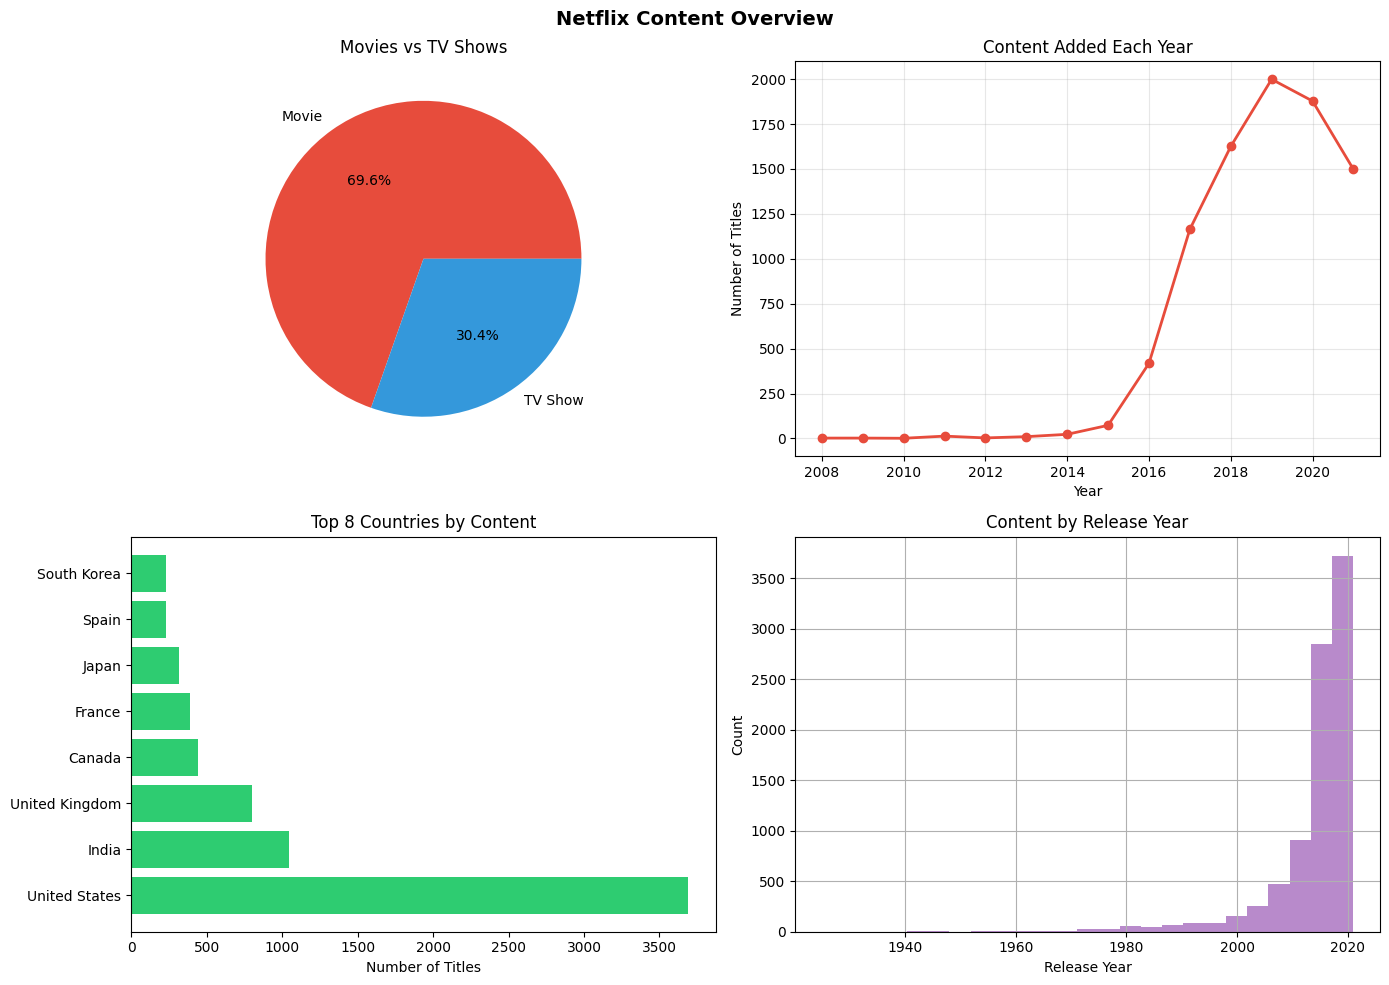

In [ ]:
print("\n=== CREATING VISUALIZATIONS ===")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Netflix Content Overview', fontsize=14, fontweight='bold')

# 1. Content type pie chart
type_counts = data['type'].value_counts()
axes[0,0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
              colors=['#e74c3c', '#3498db'])
axes[0,0].set_title('Movies vs TV Shows')

# 2. Content added by year
yearly = data.dropna(subset=['year_added']).groupby('year_added').size()
axes[0,1].plot(yearly.index, yearly.values, marker='o', color='#e74c3c', linewidth=2)
axes[0,1].set_title('Content Added Each Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Titles')
axes[0,1].grid(True, alpha=0.3)

# 3. Top countries - tricky with CSV
countries = data[data['country'] != 'Not specified']['country'].str.split(', ').explode()
top_countries = countries.value_counts().head(8)
axes[1,0].barh(range(len(top_countries)), top_countries.values, color='#2ecc71')
axes[1,0].set_yticks(range(len(top_countries)))
axes[1,0].set_yticklabels(top_countries.index)
axes[1,0].set_title('Top 8 Countries by Content')
axes[1,0].set_xlabel('Number of Titles')

# 4. Release year distribution
data['release_year'].hist(bins=25, ax=axes[1,1], color='#9b59b6', alpha=0.7)
axes[1,1].set_title('Content by Release Year')
axes[1,1].set_xlabel('Release Year')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<b>VISUALIZATION 2: Genre analysis</b>


=== ANALYZING GENRES ===


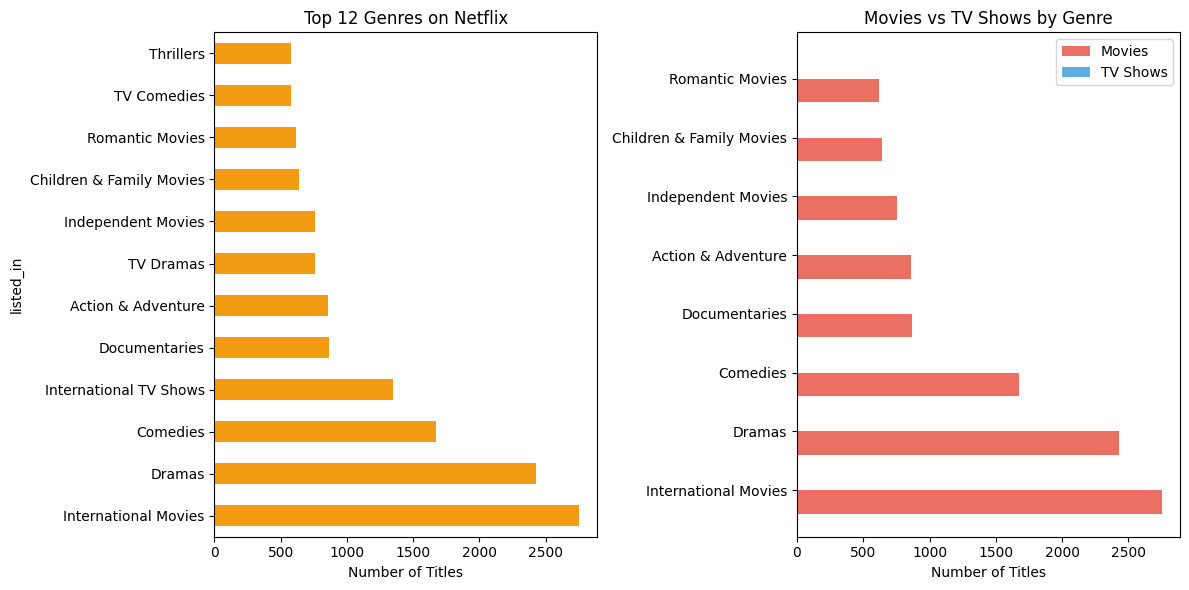

In [19]:
print("\n=== ANALYZING GENRES ===")

# Split genres and count them
genres = data['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(12)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_genres.plot(kind='barh', color='#f39c12')
plt.title('Top 12 Genres on Netflix')
plt.xlabel('Number of Titles')

# Movies vs TV shows by genre - comparing top genres
plt.subplot(1, 2, 2)
movie_genres = data[data['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().head(8)
show_genres = data[data['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().head(8)

x_pos = np.arange(len(movie_genres))
plt.barh(x_pos - 0.2, movie_genres.values, 0.4, label='Movies', color='#e74c3c', alpha=0.8)
plt.barh(x_pos + 0.2, show_genres.reindex(movie_genres.index, fill_value=0).values, 
         0.4, label='TV Shows', color='#3498db', alpha=0.8)

plt.yticks(x_pos, movie_genres.index)
plt.xlabel('Number of Titles')
plt.title('Movies vs TV Shows by Genre')
plt.legend()

plt.tight_layout()
plt.show()

<b>VISUALIZATION 3: Duration analysis</b>


=== ANALYZING DURATIONS ===


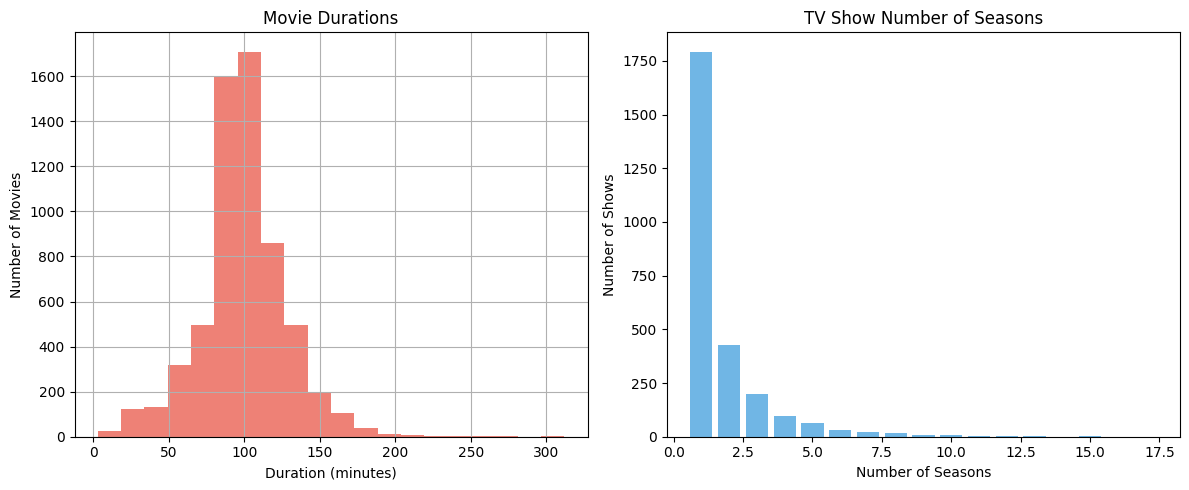


=== MONTHLY TRENDS ANALYSIS ===


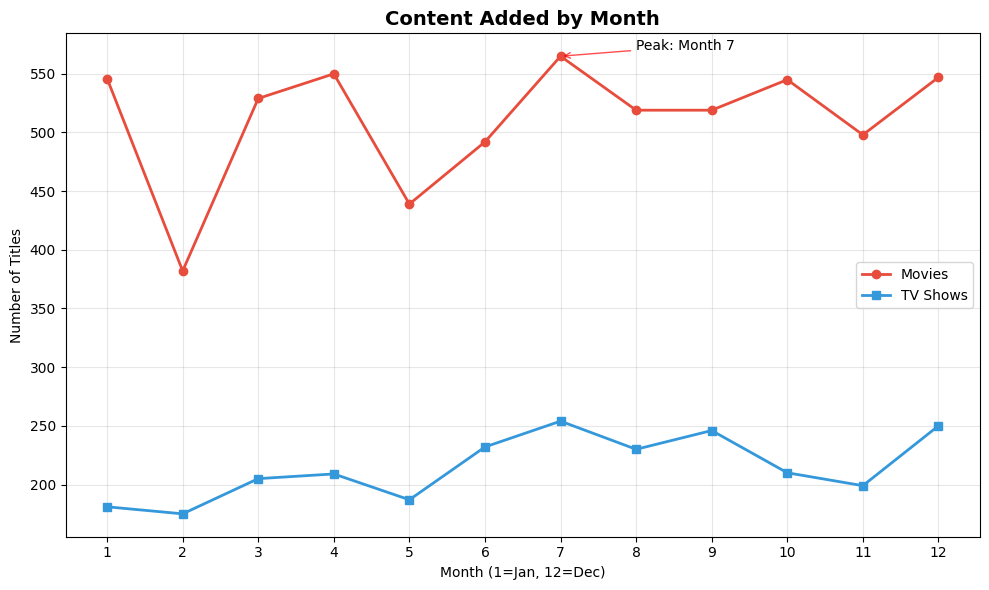


===Creating content addition heatmap ===


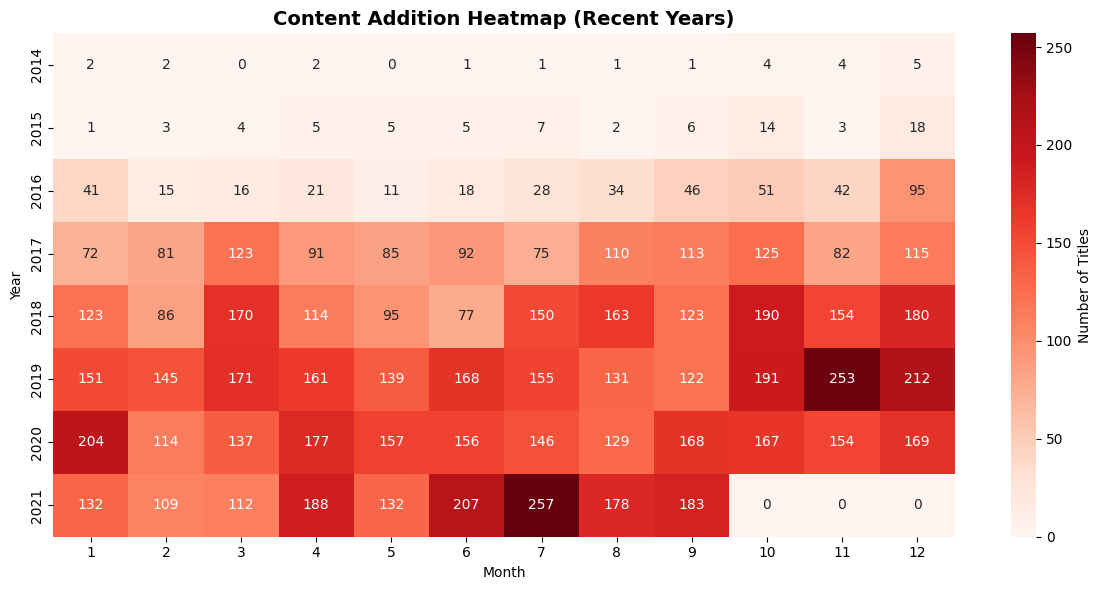


=== MY ANALYSIS SUMMARY ===
Dataset Overview:
   - Total titles: 8807
   - Movies: 69.6%
   - TV Shows: 30.4%

Geographic Insights:
   - Top producer: United States (3689 titles)

Genre Insights:
   - Most popular genre: International Movies
   - Total unique genres: 42

Time Insights:
   - Peak year for additions: 2019 (1999 titles)

Content Insights:
   - Average movie length: 100 minutes

Interesting Observations:
   - Netflix has been adding a lot more content in recent years
   - International content is a big part of Netflix strategy
   - Drama and comedy are the most popular genres
   - Most TV shows have 1-2 seasons

Analysis completed!


In [26]:
print("\n=== ANALYZING DURATIONS ===")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Movie durations
movies = data[data['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
movies['duration_min'].dropna().hist(bins=20, ax=ax1, color='#e74c3c', alpha=0.7)
ax1.set_title('Movie Durations')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Number of Movies')

# TV show seasons
shows = data[data['type'] == 'TV Show'].copy()
shows['seasons'] = shows['duration'].str.extract('(\d+)').astype(float)
season_counts = shows['seasons'].value_counts().sort_index()
ax2.bar(season_counts.index, season_counts.values, color='#3498db', alpha=0.7)
ax2.set_title('TV Show Number of Seasons')
ax2.set_xlabel('Number of Seasons')
ax2.set_ylabel('Number of Shows')

plt.tight_layout()
plt.show()

# Monthly trends analysis
print("\n=== MONTHLY TRENDS ANALYSIS ===")

# Monthly trends
monthly_data = data.dropna(subset=['date_added']).copy()
monthly_data['month'] = monthly_data['date_added'].dt.month
monthly_counts = monthly_data.groupby(['month', 'type']).size().reset_index(name='count')

# Create a nice line chart instead - considerd more reliable
plt.figure(figsize=(10, 6))
movies_monthly = monthly_counts[monthly_counts['type'] == 'Movie']
shows_monthly = monthly_counts[monthly_counts['type'] == 'TV Show']

plt.plot(movies_monthly['month'], movies_monthly['count'], 
         marker='o', label='Movies', color='#e74c3c', linewidth=2)
plt.plot(shows_monthly['month'], shows_monthly['count'], 
         marker='s', label='TV Shows', color='#3498db', linewidth=2)

plt.title('Content Added by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

# Adding some annotations for interesting points
max_month_movies = movies_monthly.loc[movies_monthly['count'].idxmax()]
plt.annotate(f'Peak: Month {int(max_month_movies["month"])}', 
             xy=(max_month_movies['month'], max_month_movies['count']),
             xytext=(max_month_movies['month']+1, max_month_movies['count']+5),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n===Creating content addition heatmap ===")

# Creating yearly-monthly heatmap data
yearly_monthly = data.dropna(subset=['date_added']).copy()
yearly_monthly['year'] = yearly_monthly['date_added'].dt.year
yearly_monthly['month'] = yearly_monthly['date_added'].dt.month

# Filtering for recent years with good data
recent_years = yearly_monthly['year'].value_counts().head(8).index
yearly_monthly_filtered = yearly_monthly[yearly_monthly['year'].isin(recent_years)]

heatmap_data = yearly_monthly_filtered.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', 
            cbar_kws={'label': 'Number of Titles'})
plt.title('Content Addition Heatmap (Recent Years)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Summary of findings
print("\n=== MY ANALYSIS SUMMARY ===")

total_titles = len(data)
movies_pct = (len(data[data['type'] == 'Movie']) / total_titles) * 100
shows_pct = (len(data[data['type'] == 'TV Show']) / total_titles) * 100

print("Dataset Overview:")
print(f"   - Total titles: {total_titles}")
print(f"   - Movies: {movies_pct:.1f}%")
print(f"   - TV Shows: {shows_pct:.1f}%")

print("\nGeographic Insights:")
top_country = top_countries.index[0]
print(f"   - Top producer: {top_country} ({top_countries.iloc[0]} titles)")

print("\nGenre Insights:")
most_popular_genre = top_genres.index[0]
print(f"   - Most popular genre: {most_popular_genre}")
print(f"   - Total unique genres: {len(genres.unique())}")

print("\nTime Insights:")
if not yearly.empty:
    peak_year = yearly.idxmax()
    print(f"   - Peak year for additions: {int(peak_year)} ({yearly.max()} titles)")

print("\nContent Insights:")
avg_movie_duration = movies['duration_min'].mean()
print(f"   - Average movie length: {avg_movie_duration:.0f} minutes")

# Observations I found interesting
print("\nInteresting Observations:")
print("   - Netflix has been adding a lot more content in recent years")
print("   - International content is a big part of Netflix strategy")
print("   - Drama and comedy are the most popular genres")
print("   - Most TV shows have 1-2 seasons")

print("\nAnalysis completed!")
